In [34]:
%matplotlib inline
import os

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

<module 'climatools.scripts.g1_threshold' from '/nuwa_cluster/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [35]:
analysis = scripts.Analysis()

In [36]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                          'radiation/crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'n2o',
                          'band07_wn_1215_1380',
                          'P_50_T_250',
                          'min_4e-21_max_1e-17_ng_5',
                          'wgt_1_1_1_1_1',
                          'midlatitude_summer_tmp')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [37]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                               'radiation/crd/LW/examples',
                               'separate_g_groups',
                               'study__lblnew_g1_threshold',
                               'n2o',
                               'band07_wn_1215_1380',
                               'P_50_T_250',
                               'min_4e-21_max_1e-17_ng_5',
                               'wgt_1_1_1_1_1',
                               'midlatitude_summer_tmp')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [38]:
fig = analysis.fig_fluxcoolr('fig1')
fig.ggroups = [1, 2, 3, 4, 5]
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-4, 50)

In [39]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [40]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [41]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [42]:
fig.display_hrefanchor()

In [43]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()
table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [44]:
table_dgdgs.display_hrefanchor()

In [45]:
s = 'Table: flux. g-group 1'
html = climahtml.getHTML_hrefanchor(s)
display.display(display.HTML(html))

# Figure: flux, cooling rate. g-group 1

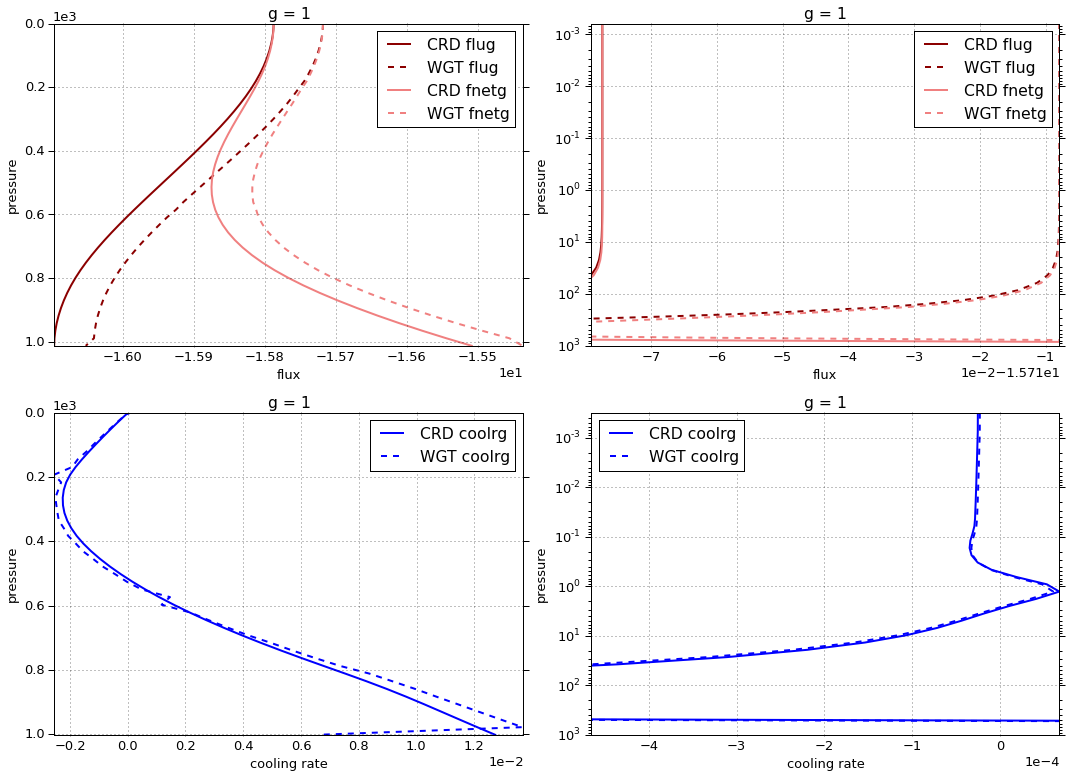

# Figure: flux, cooling rate. g-group 2

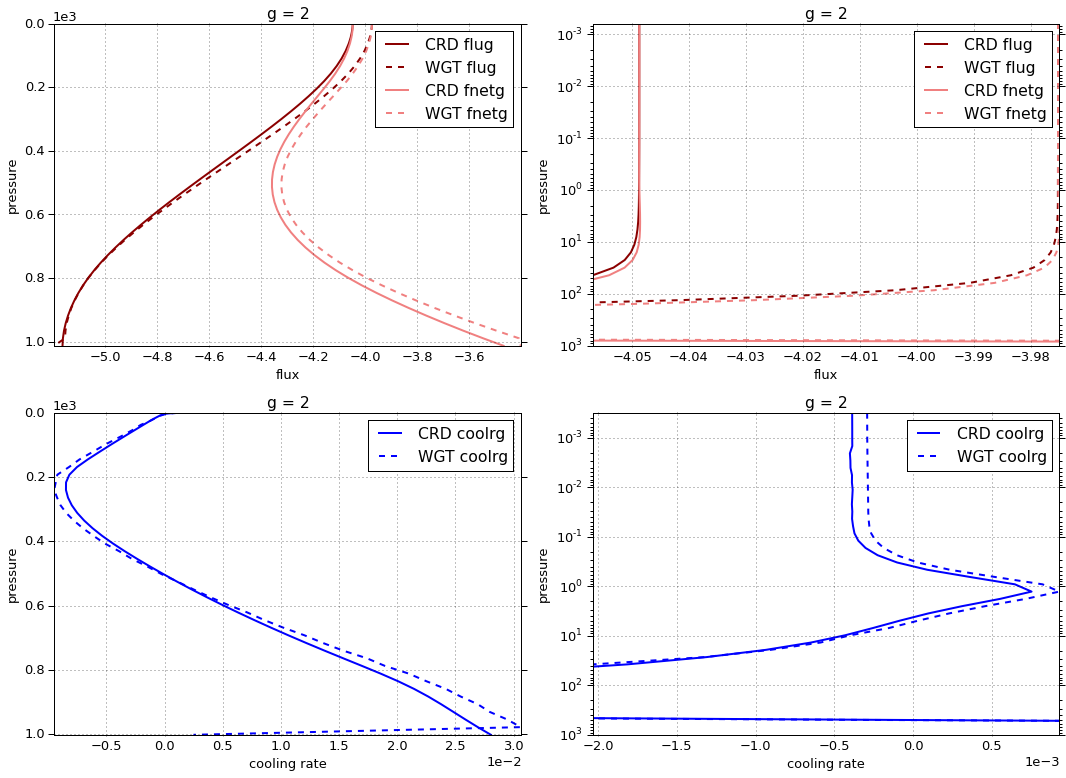

# Figure: flux, cooling rate. g-group 3

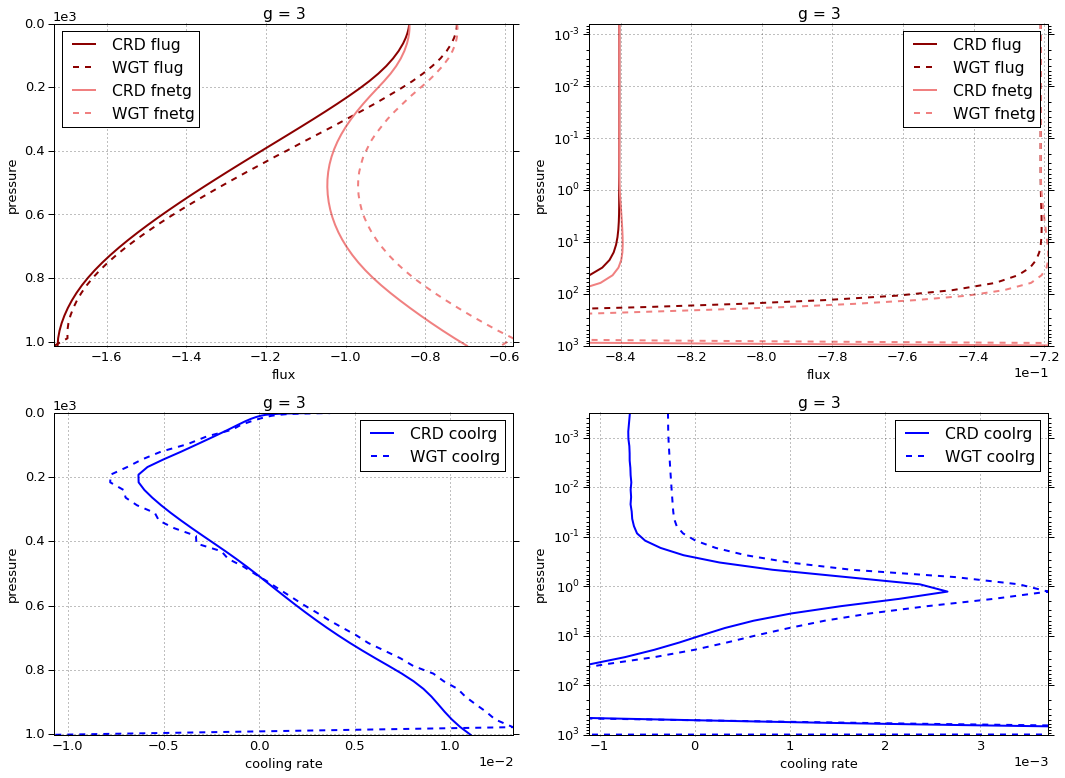

# Figure: flux, cooling rate. g-group 4

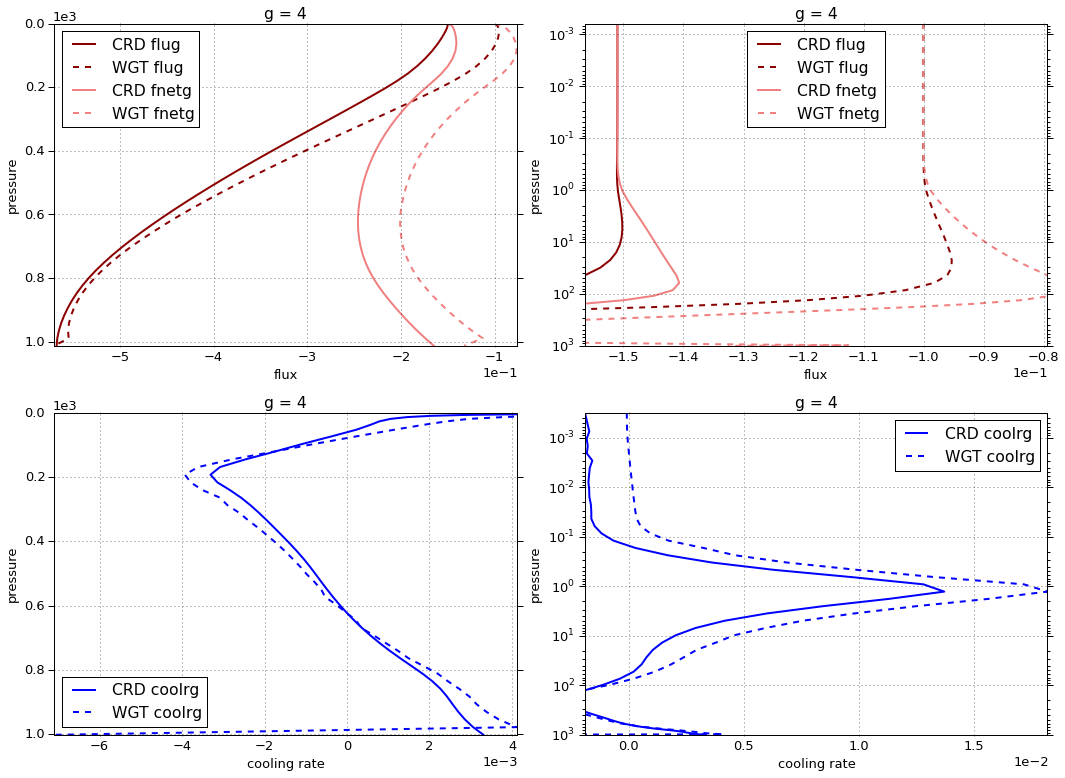

# Figure: flux, cooling rate. g-group 5

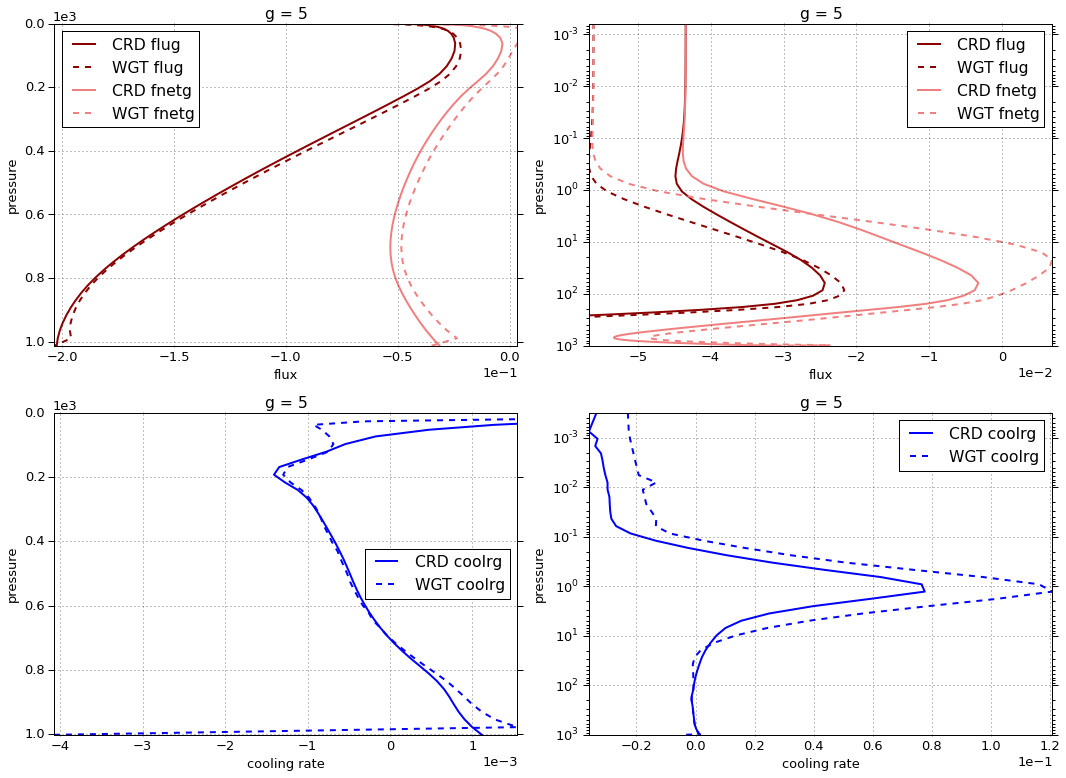

# Figure: flux, cooling rate. g-group total

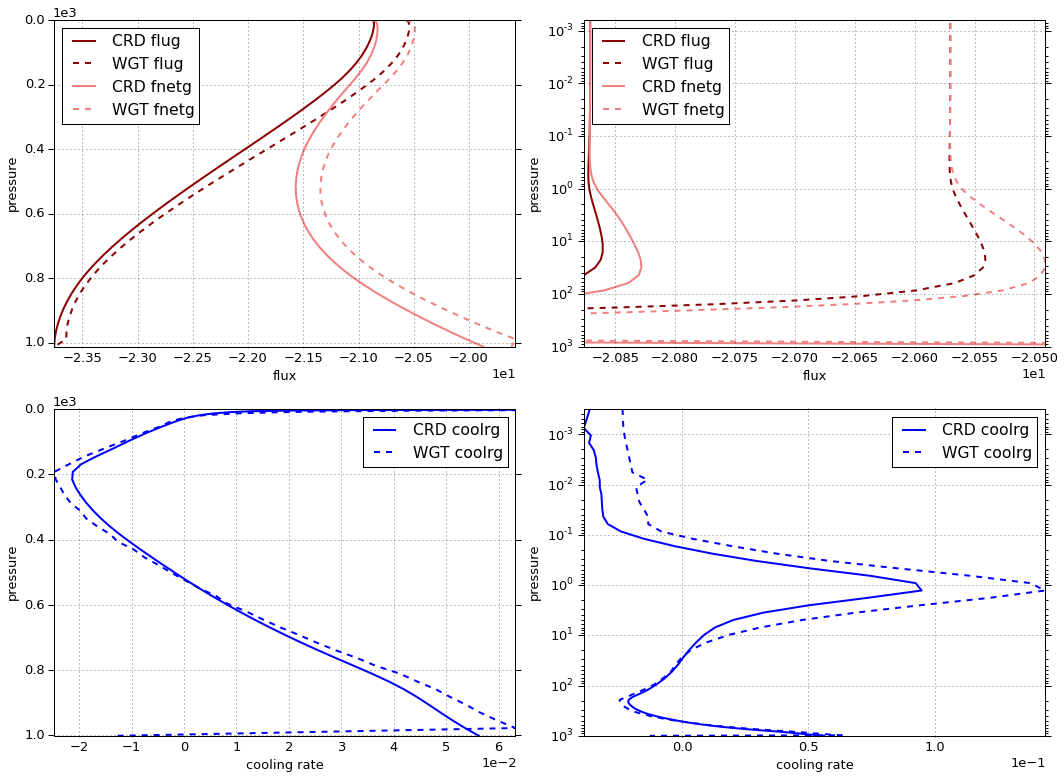

In [46]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [47]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug      fldg      fnetg
g pressure level                                
1 0        1     -15.787441  0.000000 -15.787441
  1013     76    -16.096542  0.588223 -15.508319
2 0        1      -4.048787  0.000000  -4.048787
  1013     76     -5.164903  1.696264  -3.468639
3 0        1      -0.840341  0.000000  -0.840341
  1013     76     -1.723044  1.027978  -0.695066
4 0        1      -0.150983  0.000000  -0.150983
  1013     76     -0.568162  0.403372  -0.164790
5 0        1      -0.043461  0.000000  -0.043461
  1013     76     -0.202520  0.171226  -0.031294


WGT


flug      fldg      fnetg
g pressure level                                
1 0        1     -15.717924  0.000000 -15.717924
  1013     76    -16.052070  0.615267 -15.436804
2 0        1      -3.975160  0.000000  -3.975160
  1013     76     -5.197037  1.794337  -3.402700
3 0        1      -0.720995  0.000000  -0.720995
  1013     76     -1.731616  1.121781  -0.609835
4 0        1      -0.100076  0.000000  -0.100076
  1013     76     -0.570796  0.438207  -0.132589
5 0        1      -0.056141  0.000000  -0.056141
  1013     76     -0.203652  0.168629  -0.035023


WGT - CRD


flug      fldg     fnetg
g pressure level                              
1 0        1      0.069517  0.000000  0.069517
  1013     76     0.044472  0.027043  0.071515
2 0        1      0.073627  0.000000  0.073627
  1013     76    -0.032134  0.098072  0.065938
3 0        1      0.119346  0.000000  0.119346
  1013     76    -0.008572  0.093803  0.085231
4 0        1      0.050908  0.000000  0.050908
  1013     76    -0.002634  0.034835  0.032201
5 0        1     -0.012680  0.000000 -0.012680
  1013     76    -0.001132 -0.002597 -0.003729

# Table: cooling rate. g-groups 


CRD


coolrg
g pressure    layer          
1 0.000312    1     -0.000025
  1001.112500 75     0.012723
2 0.000312    1     -0.000387
  1001.112500 75     0.028050
3 0.000312    1     -0.000681
  1001.112500 75     0.011063
4 0.000312    1     -0.001893
  1001.112500 75     0.003309
5 0.000312    1     -0.033531
  1001.112500 75     0.001114


WGT


coolrg
g pressure    layer          
1 0.000312    1     -0.000023
  1001.112500 75     0.006584
2 0.000312    1     -0.000291
  1001.112500 75     0.002484
3 0.000312    1     -0.000281
  1001.112500 75    -0.010720
4 0.000312    1     -0.000077
  1001.112500 75    -0.007106
5 0.000312    1     -0.022929
  1001.112500 75    -0.004076


WGT - CRD


coolrg
g pressure    layer          
1 0.000312    1      0.000002
  1001.112500 75    -0.006139
2 0.000312    1      0.000095
  1001.112500 75    -0.025566
3 0.000312    1      0.000400
  1001.112500 75    -0.021783
4 0.000312    1      0.001816
  1001.112500 75    -0.010415
5 0.000312    1      0.010601
  1001.112500 75    -0.005190

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,-20.871014,0.000000,-20.871014
1013,76,-23.755171,3.887063,-19.868108



WGT


,,flug,fldg,fnetg
pressure,level,,,
0,1,-20.570296,0.00000,-20.570296
1013,76,-23.755170,4.13822,-19.616951



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,3.007179e-01,0.000000,0.300718
1013,76,4.300000e-07,0.251157,0.251157


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,-0.036517
1001.112500,75,0.056259



WGT


,,coolrg
pressure,layer,
0.000312,1,-0.023602
1001.112500,75,-0.012834



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,0.012915
1001.112500,75,-0.069093


In [48]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.686218,0.675730
2,0.211370,0.218775
3,0.070764,0.072894
4,0.023352,0.024028
5,0.008297,0.008573


In [49]:
s = 'Table: flux. g-group 1'
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=1).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 1

crd                                           wgt        \
              g level       flug          fldg      fnetg   g level   
pressure                                                              
0.000000      1     1 -15.787441  0.000000e+00 -15.787441   1     1   
0.000624      1     2 -15.787441  2.069870e-10 -15.787441   1     2   
0.000876      1     3 -15.787441  2.919505e-10 -15.787441   1     3   
0.001229      1     4 -15.787441  4.146329e-10 -15.787441   1     4   
0.001723      1     5 -15.787441  5.929075e-10 -15.787441   1     5   
0.002417      1     6 -15.787441  8.520223e-10 -15.787441   1     6   
0.003391      1     7 -15.787441  1.228714e-09 -15.787441   1     7   
0.004757      1     8 -15.787441  1.776426e-09 -15.787441   1     8   
0.006672      1     9 -15.787441  2.572906e-09 -15.787441   1     9   
0.009359      1    10 -15.787441  3.731502e-09 -15.787441   1    10   
0.013128      1    11 -15.787441  5.417489e-09 -15.787441   1    11   
0.018415      1    12 -15.787441  7.872319e-09 -15.787441   1    12   
0.025830      1    13 -15.787441  1.144934e-08 -15.787441   1    13   
0.036232      1    14 -15.787441  1.666877e-08 -15.787441   1    14   
0.050823      1    15 -15.787441  2.438053e-08 -15.787441   1    15   
0.071291      1    16 -15.787441  3.669944e-08 -15.787441   1    16   
0.100000      1    17 -15.787442  5.979813e-08 -15.787442   1    17   
0.140271      1    18 -15.787442  1.083882e-07 -15.787442   1    18   
0.196760      1    19 -15.787442  2.131250e-07 -15.787442   1    19   
0.275997      1    20 -15.787443  4.395040e-07 -15.787442   1    20   
0.387100      1    21 -15.787444  9.289237e-07 -15.787443   1    21   
0.543100      1    22 -15.787445  1.987372e-06 -15.787443   1    22   
0.761700      1    23 -15.787446  4.241459e-06 -15.787442   1    23   
1.068500      1    24 -15.787449  8.605830e-06 -15.787440   1    24   
1.498800      1    25 -15.787452  1.533967e-05 -15.787437   1    25   
2.102400      1    26 -15.787457  2.347759e-05 -15.787434   1    26   
2.949000      1    27 -15.787466  3.286215e-05 -15.787433   1    27   
4.136600      1    28 -15.787479  4.391982e-05 -15.787435   1    28   
5.802500      1    29 -15.787502  5.762091e-05 -15.787444   1    29   
8.139200      1    30 -15.787540  7.567857e-05 -15.787464   1    30   
...          ..   ...        ...           ...        ...  ..   ...   
323.525000    1    47 -15.862201  1.668335e-02 -15.845518   1    47   
347.300000    1    48 -15.872323  2.090557e-02 -15.851418   1    48   
371.075000    1    49 -15.882813  2.589492e-02 -15.856918   1    49   
394.850000    1    50 -15.893609  3.171188e-02 -15.861897   1    50   
418.625000    1    51 -15.904645  3.841678e-02 -15.866229   1    51   
442.400000    1    52 -15.915862  4.606197e-02 -15.869800   1    52   
466.175000    1    53 -15.927197  5.469255e-02 -15.872505   1    53   
489.950000    1    54 -15.938599  6.435258e-02 -15.874246   1    54   
513.725000    1    55 -15.950008  7.508226e-02 -15.874926   1    55   
537.500000    1    56 -15.961372  8.691578e-02 -15.874456   1    56   
561.275000    1    57 -15.972632  9.989279e-02 -15.872739   1    57   
585.050000    1    58 -15.983731  1.140490e-01 -15.869682   1    58   
608.825000    1    59 -15.994611  1.294200e-01 -15.865191   1    59   
632.600000    1    60 -16.005211  1.460395e-01 -15.859171   1    60   
656.375000    1    61 -16.015470  1.639377e-01 -15.851532   1    61   
680.150000    1    62 -16.025328  1.831425e-01 -15.842185   1    62   
703.925000    1    63 -16.034723  2.036771e-01 -15.831046   1    63   
727.700000    1    64 -16.043592  2.255661e-01 -15.818026   1    64   
751.475000    1    65 -16.051875  2.488303e-01 -15.803045   1    65   
775.250000    1    66 -16.059515  2.734853e-01 -15.786030   1    66   
799.025000    1    67 -16.066460  2.995333e-01 -15.766927   1    67   
822.800000    1    68 -16.072674  3.269571e-01 -15.745717   1    68   
846.575000    1    69 -16.078147  3.

In [50]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')